In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv("ARP Poison,flood attack Dataset.csv")
data.head()

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1707,0,0,0.0,306446,0
1,2,3,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1708,0,0,0.0,306446,0
2,4,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1709,0,0,0.0,306446,0
3,3,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1710,0,0,0.0,306446,0
4,1,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1711,0,0,0.0,306446,0


In [ ]:
# Data Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 switch_id              0
in_port                0
outport                0
src_mac_addr(eth)      0
src_mac_addr(arp)    532
dst_mac_addr(eth)      0
dst_mac_addr(arp)    533
src_ip(arp)            0
dst_ip(arp)            0
op_code(arp)           0
packet_in_count        0
Protocol               0
Pkt loss               0
rtt (avg)              0
total_time             0
Label                  0
dtype: int64


In [ ]:
data=data.dropna()

In [ ]:
# Data Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 switch_id            0
in_port              0
outport              0
src_mac_addr(eth)    0
src_mac_addr(arp)    0
dst_mac_addr(eth)    0
dst_mac_addr(arp)    0
src_ip(arp)          0
dst_ip(arp)          0
op_code(arp)         0
packet_in_count      0
Protocol             0
Pkt loss             0
rtt (avg)            0
total_time           0
Label                0
dtype: int64


In [ ]:
data.describe()

,switch_id,in_port,outport,op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
count,133467.000000,133467.000000,1.334670e+05,133467.000000,133467.000000,133467.000000,133467.000000,133467.000000,1.334670e+05,133467.000000
mean,6.445369,3.192055,3.008508e+09,1.149775,38973.222587,0.000022,75.035027,0.010310,6.102463e+06,1.440693
std,3.793568,1.190714,1.967321e+09,0.356936,27946.665655,0.004741,43.281190,0.077722,1.374462e+07,0.863590
min,1.000000,1.000000,1.000000e+00,1.000000,1667.000000,0.000000,0.000000,0.000000,3.012470e+05,0.000000
25%,3.000000,2.000000,4.000000e+00,1.000000,14863.000000,0.000000,100.000000,0.000000,1.028649e+06,1.000000
50%,6.000000,4.000000,4.294967e+09,1.000000,29836.000000,0.000000,100.000000,0.000000,1.028649e+06,2.000000
75%,10.000000,4.000000,4.294967e+09,1.000000,62551.500000,0.000000,100.000000,0.000000,1.028649e+06,2.000000
max,13.000000,4.000000,4.294967e+09,3.000000,96543.000000,1.000000,100.000000,0.669000,4.712558e+07,2.000000


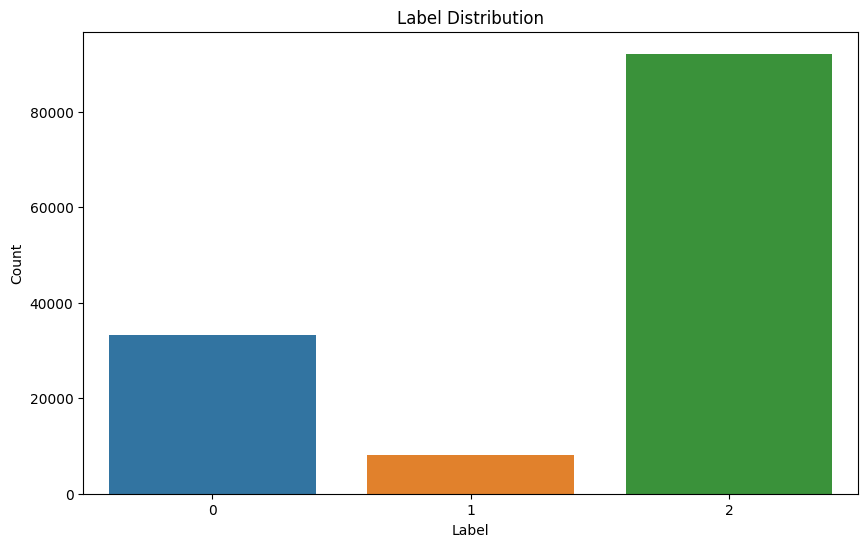

In [ ]:
# Visualization 1: Countplot for Label distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Label')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

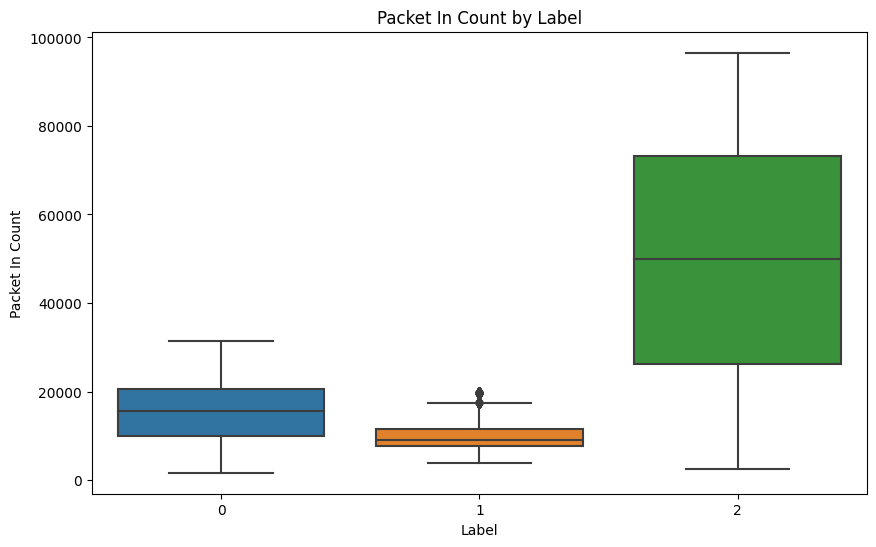

In [ ]:
# Visualization 2: Distribution of packet_in_count by Label
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Label', y='packet_in_count')
plt.title("Packet In Count by Label")
plt.xlabel("Label")
plt.ylabel("Packet In Count")
plt.show()

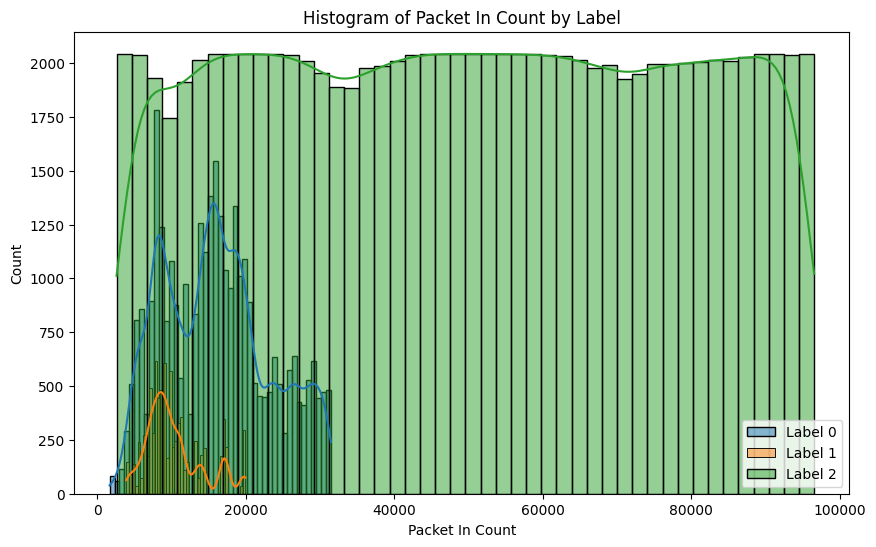

In [ ]:
# Visualization 7: Histogram of packet_in_count by Label
plt.figure(figsize=(10, 6))
for label in data['Label'].unique():
    sns.histplot(data[data['Label'] == label]['packet_in_count'], kde=True, label=f'Label {label}')
plt.title("Histogram of Packet In Count by Label")
plt.xlabel("Packet In Count")
plt.legend()
plt.show()

<ipython-input-41-17f64cfa13d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


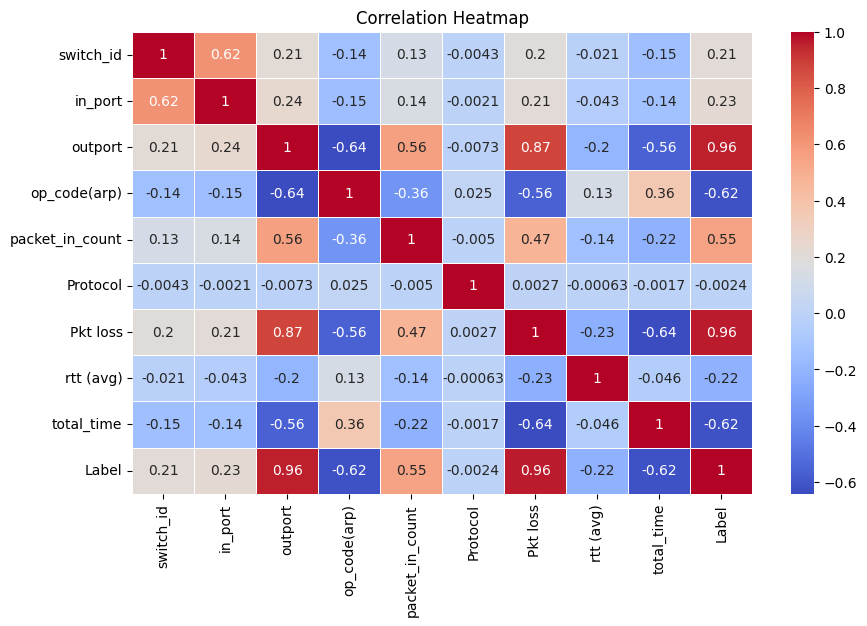

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data.corr()

<ipython-input-42-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,switch_id,in_port,outport,op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
switch_id,1.000000,0.617320,0.214143,-0.137028,0.127390,-0.004306,0.196747,-0.021266,-0.146197,0.210472
in_port,0.617320,1.000000,0.239908,-0.150979,0.141553,-0.002092,0.210508,-0.042693,-0.135026,0.229935
outport,0.214143,0.239908,1.000000,-0.641694,0.557672,-0.007250,0.873243,-0.197646,-0.563300,0.960384
op_code(arp),-0.137028,-0.150979,-0.641694,1.000000,-0.357848,0.024576,-0.562428,0.128100,0.361829,-0.617312
packet_in_count,0.127390,0.141553,0.557672,-0.357848,1.000000,-0.004980,0.472649,-0.139472,-0.224705,0.545180
Protocol,-0.004306,-0.002092,-0.007250,0.024576,-0.004980,1.000000,0.002735,-0.000629,-0.001733,-0.002419
Pkt loss,0.196747,0.210508,0.873243,-0.562428,0.472649,0.002735,1.000000,-0.229973,-0.641148,0.962275
rtt (avg),-0.021266,-0.042693,-0.197646,0.128100,-0.139472,-0.000629,-0.229973,1.000000,-0.046142,-0.221297
total_time,-0.146197,-0.135026,-0.563300,0.361829,-0.224705,-0.001733,-0.641148,-0.046142,1.000000,-0.616424
Label,0.210472,0.229935,0.960384,-0.617312,0.545180,-0.002419,0.962275,-0.221297,-0.616424,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Identify string (categorical) columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder for each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.head()

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4294967291,6,6,27,0,89,3,1,1707,0,0,0.0,306446,0
1,2,3,4294967291,6,6,27,0,89,3,1,1708,0,0,0.0,306446,0
2,4,4,4294967291,6,6,27,0,89,3,1,1709,0,0,0.0,306446,0
3,3,4,4294967291,6,6,27,0,89,3,1,1710,0,0,0.0,306446,0
4,1,1,4294967291,6,6,27,0,89,3,1,1711,0,0,0.0,306446,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# Split the data into features and target
X = data.drop("Label", axis=1)
y = data["Label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define a list of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-NN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    print(f"Training {classifier_name}...")
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"{classifier_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{classification_rep}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

Training Random Forest...
Random Forest Evaluation Metrics:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6714
           1       1.00      1.00      1.00      1602
           2       1.00      1.00      1.00     18378

    accuracy                           1.00     26694
   macro avg       1.00      1.00      1.00     26694
weighted avg       1.00      1.00      1.00     26694

Confusion Matrix:
[[ 6714     0     0]
 [    0  1602     0]
 [    0     0 18378]]

Training Logistic Regression...
Logistic Regression Evaluation Metrics:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6714
           1       1.00      1.00      1.00      1602
           2       1.00      1.00      1.00     18378

    accuracy                           1.00     26694
   macro avg       1.00      1.00      1.00     26694
we